In [1]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
import urllib
# To ignore some warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
#loading in building-level file

url = 'https://raw.githubusercontent.com/wshenyc/MLForCities/main/Data/building_data_final.csv'
df = pd.read_csv(url)

In [3]:
#158,185 rows corresponding to a unique building based on Borough, Block, Lot (BBL)
#116 columns 
df.set_index('bbl', inplace=True)
df.shape

(158185, 114)

In [11]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()

In [5]:
df

,county,res_units,other_units,buildings,basement_code,lot_area,comp_bbl_2017,comp_bbl_2018,comp_bbl_2019,comp_bbl_2020,...,building_class_W3,building_class_W4,building_class_W6,building_class_W7,building_class_W8,building_class_W9,building_class_Y4,building_class_Z4,building_class_Z9,outcome
bbl,,,,,,,,,,,,,,,,,,,,,
3047940001,47,4,3,2,5,4000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3047940017,47,3,0,1,2,2000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3047940078,47,3,0,1,2,1400,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2032790058,5,6,0,1,5,2703,0.000000,0.000000,1.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1011980126,61,7,0,1,1,1916,0.000000,1.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011980055,61,3,0,1,1,1839,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2039340058,5,3,0,1,5,2700,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3087140010,47,46,0,1,0,10000,13.673913,14.173913,0.521739,0.173913,...,0,0,0,0,0,0,0,0,0,1


In [6]:
X = df.loc[:, "res_units":"building_class_Z9"]
y = df.loc[:, 'outcome']

In [7]:
km = KMeans(n_clusters = 5, random_state= 2000)
kmfit = km.fit(X)
kmdf = df.copy()
kmdf['km_label'] = kmfit.labels_

In [8]:
print ("The # of clusters for K-MEANS is: 5 are distributed as follows :")
print (kmdf['km_label'].value_counts())

The # of clusters for K-MEANS is: 5 are distributed as follows :
0    157792
4       376
3        12
2         4
1         1
Name: km_label, dtype: int64


In [9]:
kmdf.loc[kmdf['km_label']==1]

,county,res_units,other_units,buildings,basement_code,lot_area,comp_bbl_2017,comp_bbl_2018,comp_bbl_2019,comp_bbl_2020,...,building_class_W4,building_class_W6,building_class_W7,building_class_W8,building_class_W9,building_class_Y4,building_class_Z4,building_class_Z9,outcome,km_label
bbl,,,,,,,,,,,,,,,,,,,,,
4163500400,81,1887,19,1856,5,12253428,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1


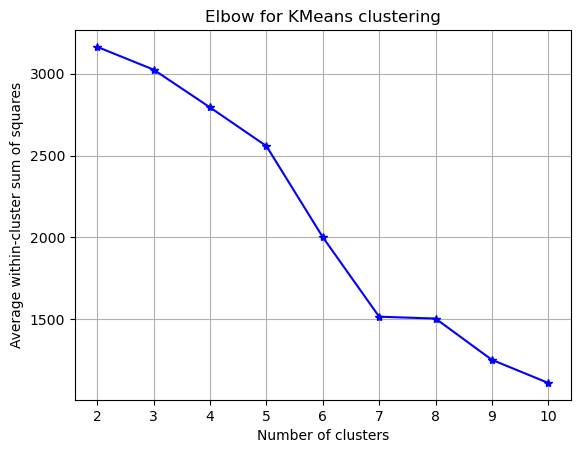

In [12]:
elbow(X, range(2,11))

In [13]:
for n_clusters in range(2,11): #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.9996620029560708
For n_clusters =3, the average silhouette_score is :0.9983108720528872
For n_clusters =4, the average silhouette_score is :0.9892297681751955
For n_clusters =5, the average silhouette_score is :0.9756945603887046
For n_clusters =6, the average silhouette_score is :0.9263211316896401
For n_clusters =7, the average silhouette_score is :0.8822949365956588
For n_clusters =8, the average silhouette_score is :0.8845244820298744
For n_clusters =9, the average silhouette_score is :0.8596561137270935
For n_clusters =10, the average silhouette_score is :0.8477289965052048
